In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
%matplotlib inline

import seaborn as sns
sns.set()
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV

from collections import Counter

In [2]:
# getting the additional sampling data
from imblearn.over_sampling import SMOTE

# Model Validation

from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,roc_curve,roc_auc_score

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [4]:
from sklearn.naive_bayes import MultinomialNB

In [5]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

In [6]:
import warnings
warnings.filterwarnings('ignore')

In [7]:
data=pd.read_csv("updated_mobile_data.csv")
data

,rating,cleaned_reviews,category,cleaned_reviews_1,polarity
0,1.0,disappoint overal perform samsung,Negative,"['disappoint', 'overal', 'perform', 'samsung']",0.000000e+00
1,4.0,got mobil launch datebatteri must appreciatedc...,Positive,"['get', 'mobil', 'launch', 'datebatteri', 'app...",1.375000e-01
2,3.0,camera qualiti low,Neutral,"['camera', 'qualiti', 'low']",0.000000e+00
3,1.0,doesnt work ghz wifi frequenc ghz old school c...,Negative,"['work', 'ghz', 'wifi', 'frequenc', 'ghz', 'ol...",7.878788e-02
4,1.0,worth buyingfaulti softwar poor display qualit...,Negative,"['worth', 'buyingfaulti', 'softwar', 'poor', '...",-5.000000e-02
...,...,...,...,...,...
4986,2.0,heavi n bulgi era good second phone tooi suppo...,Negative,"['heavi', 'bulgi', 'era', 'good', 'second', 'p...",3.500000e-01
4987,4.0,nice mobil batteri life good charg also faston...,Positive,"['nice', 'mobil', 'batteri', 'life', 'good', '...",6.333333e-01
4988,3.0,camera qualiti good look like mega pixel camer...,Neutral,"['camera', 'qualiti', 'good', 'look', 'like', ...",5.551115e-17
4989,5.0,phon mai bettri fingerprint shi hai ba bki kuc...,Positive,"['phon', 'mai', 'bettri', 'fingerprint', 'shi'...",0.000000e+00


In [8]:
data1=data[['cleaned_reviews','category']]
data1

,cleaned_reviews,category
0,disappoint overal perform samsung,Negative
1,got mobil launch datebatteri must appreciatedc...,Positive
2,camera qualiti low,Neutral
3,doesnt work ghz wifi frequenc ghz old school c...,Negative
4,worth buyingfaulti softwar poor display qualit...,Negative
...,...,...
4986,heavi n bulgi era good second phone tooi suppo...,Negative
4987,nice mobil batteri life good charg also faston...,Positive
4988,camera qualiti good look like mega pixel camer...,Neutral
4989,phon mai bettri fingerprint shi hai ba bki kuc...,Positive


In [9]:
data1['category'].value_counts()

Positive    2864
Negative    1518
Neutral      609
Name: category, dtype: int64

In [10]:
data1=data1.drop(data1.index[data1['category'] == 'Neutral'])
data1

,cleaned_reviews,category
0,disappoint overal perform samsung,Negative
1,got mobil launch datebatteri must appreciatedc...,Positive
3,doesnt work ghz wifi frequenc ghz old school c...,Negative
4,worth buyingfaulti softwar poor display qualit...,Negative
5,worst samsung mobil seen samsung sceen qualiti...,Negative
...,...,...
4985,overal perform goodth problem weight phone qui...,Positive
4986,heavi n bulgi era good second phone tooi suppo...,Negative
4987,nice mobil batteri life good charg also faston...,Positive
4989,phon mai bettri fingerprint shi hai ba bki kuc...,Positive


In [11]:
data1=data1.reset_index()

In [12]:
data1

,index,cleaned_reviews,category
0,0,disappoint overal perform samsung,Negative
1,1,got mobil launch datebatteri must appreciatedc...,Positive
2,3,doesnt work ghz wifi frequenc ghz old school c...,Negative
3,4,worth buyingfaulti softwar poor display qualit...,Negative
4,5,worst samsung mobil seen samsung sceen qualiti...,Negative
...,...,...,...
4377,4985,overal perform goodth problem weight phone qui...,Positive
4378,4986,heavi n bulgi era good second phone tooi suppo...,Negative
4379,4987,nice mobil batteri life good charg also faston...,Positive
4380,4989,phon mai bettri fingerprint shi hai ba bki kuc...,Positive


In [13]:
data1=data1[['cleaned_reviews','category']]
data1

,cleaned_reviews,category
0,disappoint overal perform samsung,Negative
1,got mobil launch datebatteri must appreciatedc...,Positive
2,doesnt work ghz wifi frequenc ghz old school c...,Negative
3,worth buyingfaulti softwar poor display qualit...,Negative
4,worst samsung mobil seen samsung sceen qualiti...,Negative
...,...,...
4377,overal perform goodth problem weight phone qui...,Positive
4378,heavi n bulgi era good second phone tooi suppo...,Negative
4379,nice mobil batteri life good charg also faston...,Positive
4380,phon mai bettri fingerprint shi hai ba bki kuc...,Positive


In [14]:
def categorical_to_ratings(x):
    if x=='Positive':
        return 1
    else:
        return 0

In [15]:
data1['ratings']=data1['category'].apply(categorical_to_ratings)
data1

,cleaned_reviews,category,ratings
0,disappoint overal perform samsung,Negative,0
1,got mobil launch datebatteri must appreciatedc...,Positive,1
2,doesnt work ghz wifi frequenc ghz old school c...,Negative,0
3,worth buyingfaulti softwar poor display qualit...,Negative,0
4,worst samsung mobil seen samsung sceen qualiti...,Negative,0
...,...,...,...
4377,overal perform goodth problem weight phone qui...,Positive,1
4378,heavi n bulgi era good second phone tooi suppo...,Negative,0
4379,nice mobil batteri life good charg also faston...,Positive,1
4380,phon mai bettri fingerprint shi hai ba bki kuc...,Positive,1


Text(0, 0.5, 'Sentiment Value Count')

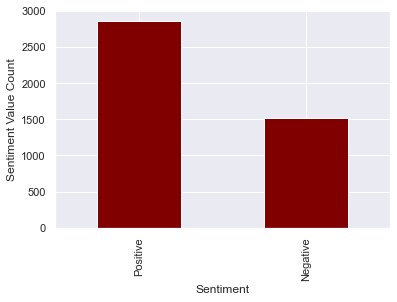

In [16]:
data1['category'].value_counts().plot.bar(color = 'maroon')

plt.xlabel('Sentiment')
plt.ylabel('Sentiment Value Count')

In [17]:
vectorizer = TfidfVectorizer()
array = vectorizer.fit_transform(data1['cleaned_reviews'].values.astype('U')).toarray()

In [18]:
review_df = pd.DataFrame(array,columns= vectorizer.get_feature_names())
review_df

,aa,aaccessori,aacha,aachhi,aanel,aap,aapki,aata,aati,aaya,...,yr,zabardsti,zappi,zeiss,zero,ziyada,zomato,zoom,zoomgoogl,zoomheavybatteri
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [19]:
review_df['category'] =  data1['category']
review_df

,aa,aaccessori,aacha,aachhi,aanel,aap,aapki,aata,aati,aaya,...,zabardsti,zappi,zeiss,zero,ziyada,zomato,zoom,zoomgoogl,zoomheavybatteri,category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
4379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive


In [20]:
review_df.columns

Index(['aa', 'aaccessori', 'aacha', 'aachhi', 'aanel', 'aap', 'aapki', 'aata',
       'aati', 'aaya',
       ...
       'zabardsti', 'zappi', 'zeiss', 'zero', 'ziyada', 'zomato', 'zoom',
       'zoomgoogl', 'zoomheavybatteri', 'category'],
      dtype='object', length=6633)

In [21]:
review_df=review_df.drop_duplicates()
review_df

,aa,aaccessori,aacha,aachhi,aanel,aap,aapki,aata,aati,aaya,...,zabardsti,zappi,zeiss,zero,ziyada,zomato,zoom,zoomgoogl,zoomheavybatteri,category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Negative
4379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive
4380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,Positive


In [22]:
review_df.shape

(4051, 6633)

In [23]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
review_df['category'] = encode.fit_transform(review_df['category'])

In [24]:
review_df

,aa,aaccessori,aacha,aachhi,aanel,aap,aapki,aata,aati,aaya,...,zabardsti,zappi,zeiss,zero,ziyada,zomato,zoom,zoomgoogl,zoomheavybatteri,category
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4377,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4378,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
4379,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4380,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1


In [25]:
X = review_df.drop(['category'],axis = 1)
y = review_df['category']

In [26]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2, random_state=7, shuffle=True)

In [27]:
# smote_balance = SMOTE(k_neighbors = 10, sampling_strategy='not majority',random_state= 7)
# X_smote, y_smote = balance.fit_resample(X,y)
# print(y_smote.value_counts())
# # y_bal.value_counts().plot.pie(autopct = '%0.2f%%')
# X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,test_size=0.2, random_state=7, shuffle=True)

In [28]:
# from imblearn.over_sampling import ADASYN
# ada_balance = ADASYN(sampling_strategy='not majority',random_state= 7)
# X_ada, y_ada = ada_balance.fit_resample(X,y)
# print(y_ada.value_counts())
# X_train_ada,X_test_ada,y_train_ada,y_test_ada = train_test_split(X_ada,y_ada,test_size=0.2, random_state=7, shuffle=True)
# # y_bal.value_counts().plot.pie(autopct = '%0.2f%%')

In [29]:
# nb_model = MultinomialNB()
# multi_nomial = nb_model.fit(X_train,y_train)
# y_pred_train = multi_nomial.predict(X_train)
# y_pred_test = multi_nomial.predict(X_test)

# print(f'Accuracy of Model is = {accuracy_score(y_train,y_pred_train)*100} %')
# print(f'Accuracy of Model is = {accuracy_score(y_test,y_pred_test)*100} %')
# print("---------------Classification Report--------------")
# print(classification_report(y_test,y_pred_test))

In [30]:
# x_alpha=[0.000001,0.000004,0.000006,0.000008,0.00001,0.000012,0.000013,0.000014,0.000015,0.000016,0.000017,0.000018,0.00002,0.00003]
# y_accuracy=[]
# for x in x_alpha:
#     clf = Pipeline([('clf', MultinomialNB(alpha=x))])
#     nb_model = MultinomialNB()
#     multi_nomial = clf.fit(X_train,y_train)
#     classifier_model = multi_nomial.fit(X_train,y_train)
#     y_accuracy.append(np.mean(classifier_model.predict(X_test)== y_test))

In [31]:
# plt.plot(x_alpha,y_accuracy,'*k')
# plt.ylabel('Accuracies')
# plt.xlabel('Learning Rate')
# plt.show()
# print(y_accuracy)

In [32]:
# nb_model_smote = MultinomialNB()
# multi_nomial_smote = nb_model_bal.fit(X_train_smote,y_train_smote)
# y_pred_train_smote = multi_nomial_bal.predict(X_train_smote)
# y_pred_test_smote = multi_nomial_bal.predict(X_test_smote)

# print(f'Accuracy of Model is = {accuracy_score(y_train_smote,y_pred_train_smote)*100} %')
# print(f'Accuracy of Model is = {accuracy_score(y_test_smote,y_pred_test_smote)*100} %')
# print("---------------Classification Report--------------")
# print(classification_report(y_test_smote,y_pred_test_smote))

In [33]:
model = list()
resample = list()
precision = list()
recall = list()
F1score = list()
Accuracy=list()

In [34]:
def test_eval(clf_model, X_test, y_test, algo=None, sampling=None):
    # Test set prediction
#     y_prob=clf_model.predict_proba(X_test)
    y_pred=clf_model.predict(X_test)

    print('Classification Report')
    print('='*60)
    print(classification_report(y_test,y_pred),"\n")
    model.append(algo)
    precision.append(precision_score(y_test,y_pred))
    recall.append(recall_score(y_test,y_pred))
    F1score.append(f1_score(y_test,y_pred))
    resample.append(sampling)
#     print(f'Accuracy of Model is = {accuracy_score(y_train,y_pred_train_bal)*100} %')
    print(f'Testing Accuracy of Model is = {accuracy_score(y_test,y_pred)} ')
    Accuracy.append(accuracy_score(y_test,y_pred))

## Model-1 Logistic Regression

###### Logistic Regression: with Actual data

In [35]:
log_model=LogisticRegression()
params={'C':np.logspace(-10, 1, 15),'class_weight':[None,'balanced'],'penalty':['l1','l2']}
cv = StratifiedKFold(n_splits=5, random_state=100, shuffle=True)
clf_LR = GridSearchCV(log_model, params, cv=cv, scoring='roc_auc', n_jobs=-1)
clf_LR.fit(X_train, y_train)
clf_LR.best_estimator_

LogisticRegression(C=1.6378937069540613, class_weight='balanced')

In [36]:
test_eval(clf_LR,X_test, y_test, 'Logistic Regression', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.82      0.87      0.84       278
           1       0.93      0.90      0.91       533

    accuracy                           0.89       811
   macro avg       0.87      0.89      0.88       811
weighted avg       0.89      0.89      0.89       811
 

Testing Accuracy of Model is = 0.8890258939580764 


###### Logistic Regression with SMOTE analysis

In [37]:
smote_balance = SMOTE(k_neighbors = 10, sampling_strategy='not majority',random_state= 7)
X_smote, y_smote = smote_balance.fit_resample(X,y)
print(y_smote.value_counts())
# y_bal.value_counts().plot.pie(autopct = '%0.2f%%')
X_train_smote,X_test_smote,y_train_smote,y_test_smote = train_test_split(X_smote,y_smote,test_size=0.2, random_state=7, shuffle=True)

0    2554
1    2554
Name: category, dtype: int64


In [38]:
log_reg_smote = LogisticRegression()
log_reg_model_smote = log_reg_smote.fit(X_train_smote,y_train_smote)

In [39]:
test_eval(log_reg_model_smote,X_test, y_test, 'Logistic Regression', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.94      0.91       278
           1       0.97      0.93      0.95       533

    accuracy                           0.94       811
   macro avg       0.93      0.94      0.93       811
weighted avg       0.94      0.94      0.94       811
 

Testing Accuracy of Model is = 0.93711467324291 


###### Logistic Regression with ADASYN analysis

In [40]:
from imblearn.over_sampling import ADASYN
ada_balance = ADASYN(sampling_strategy='not majority',random_state= 7)
X_ada, y_ada = ada_balance.fit_resample(X,y)
print(y_ada.value_counts())
X_train_ada,X_test_ada,y_train_ada,y_test_ada = train_test_split(X_ada,y_ada,test_size=0.2, random_state=7, shuffle=True)
# y_bal.value_counts().plot.pie(autopct = '%0.2f%%')

1    2554
0    2372
Name: category, dtype: int64


In [41]:
log_reg_ada = LogisticRegression()
log_reg_model_ada= log_reg_ada.fit(X_train_ada,y_train_ada)

In [42]:
test_eval(log_reg_model_ada,X_test, y_test, 'Logistic Regression', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.96      0.92       278
           1       0.98      0.93      0.95       533

    accuracy                           0.94       811
   macro avg       0.93      0.94      0.93       811
weighted avg       0.94      0.94      0.94       811
 

Testing Accuracy of Model is = 0.9395807644882861 


## Model-2 Decision Tree

###### Actual data

In [43]:
estimators = [2,10,30,50,100]
# Maximum number of depth in each tree:
max_depth = [i for i in range(5,16,2)]
# Minimum number of samples to consider to split a node:
min_samples_split = [2, 5, 10, 15, 20, 50, 100]
# Minimum number of samples to consider at each leaf node:
min_samples_leaf = [1, 2, 5]

In [44]:
tree_model = DecisionTreeClassifier()
tree_param_grid = { 
    'max_depth': max_depth,
    'min_samples_split': min_samples_split,
    'min_samples_leaf': min_samples_leaf
}
DT = RandomizedSearchCV(tree_model, tree_param_grid, cv=cv, scoring='roc_auc', n_jobs=-1, verbose=2)
DT.fit(X_train, y_train)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


RandomizedSearchCV(cv=StratifiedKFold(n_splits=5, random_state=100, shuffle=True),
                   estimator=DecisionTreeClassifier(), n_jobs=-1,
                   param_distributions={'max_depth': [5, 7, 9, 11, 13, 15],
                                        'min_samples_leaf': [1, 2, 5],
                                        'min_samples_split': [2, 5, 10, 15, 20,
                                                              50, 100]},
                   scoring='roc_auc', verbose=2)

In [45]:
test_eval(DT, X_test, y_test, 'Decision Tree', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.80      0.55      0.65       278
           1       0.80      0.93      0.86       533

    accuracy                           0.80       811
   macro avg       0.80      0.74      0.75       811
weighted avg       0.80      0.80      0.79       811
 

Testing Accuracy of Model is = 0.7977805178791615 


###### Decision Tree with SMOTE

In [46]:
DT_smote = DecisionTreeClassifier()
DT_smote_model = DT_smote.fit(X_train_smote,y_train_smote)
test_eval(DT_smote,X_test, y_test, 'Decision Tree', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.93      0.92       278
           1       0.96      0.95      0.96       533

    accuracy                           0.94       811
   macro avg       0.93      0.94      0.94       811
weighted avg       0.94      0.94      0.94       811
 

Testing Accuracy of Model is = 0.9432799013563502 


###### Decision Tree with ADASYN

In [47]:
DT_ada = DecisionTreeClassifier()
DT_ada_model = DT_ada.fit(X_train_ada,y_train_ada)
test_eval(DT_ada,X_test, y_test, 'Decision Tree', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.94      0.92       278
           1       0.97      0.94      0.95       533

    accuracy                           0.94       811
   macro avg       0.93      0.94      0.94       811
weighted avg       0.94      0.94      0.94       811
 

Testing Accuracy of Model is = 0.9408138101109741 


## Model3-Random forest 

In [48]:
rf_model = RandomForestClassifier()
rf_params={'n_estimators':estimators,
           'max_depth':max_depth,
           'min_samples_split':min_samples_split}
RF = RandomizedSearchCV(rf_model, rf_params, cv=cv, scoring='roc_auc', n_jobs=-1, n_iter=20, verbose=2)
RF.fit(X_train, y_train)
# clf_RF.best_estimator_
test_eval(RF, X_test, y_test, 'RandomForest', 'actual')

Fitting 5 folds for each of 20 candidates, totalling 100 fits
Classification Report
              precision    recall  f1-score   support

           0       0.94      0.49      0.65       278
           1       0.79      0.98      0.88       533

    accuracy                           0.82       811
   macro avg       0.87      0.74      0.76       811
weighted avg       0.84      0.82      0.80       811
 

Testing Accuracy of Model is = 0.8162762022194822 


###### Random Forest with SMOTE analysis

In [49]:
RF_smote = RandomForestClassifier()
RF_smote_model = RF_smote.fit(X_train_smote,y_train_smote)
test_eval(RF_smote,X_test, y_test, 'RandomForest', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.95      0.94       278
           1       0.97      0.97      0.97       533

    accuracy                           0.96       811
   macro avg       0.96      0.96      0.96       811
weighted avg       0.96      0.96      0.96       811
 

Testing Accuracy of Model is = 0.9617755856966708 


###### Random Forest with ADASYN 

In [50]:
RF_ada = RandomForestClassifier()
RF_ada_model = RF_ada.fit(X_train_ada,y_train_ada)
test_eval(RF_ada,X_test, y_test, 'RandomForest', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.93      0.98      0.96       278
           1       0.99      0.96      0.98       533

    accuracy                           0.97       811
   macro avg       0.96      0.97      0.97       811
weighted avg       0.97      0.97      0.97       811
 

Testing Accuracy of Model is = 0.969173859432799 


## Model-4 Naive Bayes

In [51]:
nb = MultinomialNB()
nb_model = nb.fit(X_train,y_train)
test_eval(nb_model,X_test, y_test, 'Naive Bayes', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.91      0.64      0.75       278
           1       0.84      0.97      0.90       533

    accuracy                           0.85       811
   macro avg       0.87      0.80      0.82       811
weighted avg       0.86      0.85      0.85       811
 

Testing Accuracy of Model is = 0.8545006165228114 


###### Naive Bayes with Smote

In [52]:
NB_smote = MultinomialNB()
NB_smote_model = NB_smote.fit(X_train_smote,y_train_smote)
test_eval(NB_smote,X_test, y_test, 'Naive Bayes', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.89      0.91      0.90       278
           1       0.95      0.94      0.95       533

    accuracy                           0.93       811
   macro avg       0.92      0.93      0.92       811
weighted avg       0.93      0.93      0.93       811
 

Testing Accuracy of Model is = 0.9297163995067818 


###### Naive Bayes :ADASYN

In [53]:
NB_ada = MultinomialNB()
NB_ada_model = NB_ada.fit(X_train_ada,y_train_ada)
test_eval(NB_ada,X_test, y_test, 'Naive Bayes', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       278
           1       0.96      0.93      0.95       533

    accuracy                           0.93       811
   macro avg       0.92      0.93      0.93       811
weighted avg       0.93      0.93      0.93       811
 

Testing Accuracy of Model is = 0.9321824907521579 


## Model-5 LinearSVC

###### LinearSVC :actual

In [54]:
from sklearn.svm import LinearSVC
svc=LinearSVC()
svc_model=svc.fit(X_train,y_train)
test_eval(svc_model,X_test, y_test, 'Linesr SVC', 'actual')

Classification Report
              precision    recall  f1-score   support

           0       0.86      0.81      0.83       278
           1       0.90      0.93      0.92       533

    accuracy                           0.89       811
   macro avg       0.88      0.87      0.87       811
weighted avg       0.89      0.89      0.89       811
 

Testing Accuracy of Model is = 0.8877928483353884 


###### Linear SVC :smote

In [55]:
SVC_smote = LinearSVC()
SVC_smote_model = SVC_smote.fit(X_train_smote,y_train_smote)
test_eval(SVC_smote_model,X_test, y_test, 'Linesr SVC', 'smote')

Classification Report
              precision    recall  f1-score   support

           0       0.94      0.97      0.95       278
           1       0.98      0.97      0.97       533

    accuracy                           0.97       811
   macro avg       0.96      0.97      0.96       811
weighted avg       0.97      0.97      0.97       811
 

Testing Accuracy of Model is = 0.966707768187423 


###### Linear SVC:adasyn

In [56]:
SVC_ada = LinearSVC()
SVC_ada_model = SVC_ada.fit(X_train_ada,y_train_ada)
test_eval(NB_ada,X_test, y_test, 'Linesr SVC', 'adasyn')

Classification Report
              precision    recall  f1-score   support

           0       0.88      0.93      0.90       278
           1       0.96      0.93      0.95       533

    accuracy                           0.93       811
   macro avg       0.92      0.93      0.93       811
weighted avg       0.93      0.93      0.93       811
 

Testing Accuracy of Model is = 0.9321824907521579 


In [60]:
import nltk
import re
nltk.download('stopwords')
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\vinis\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [73]:
def predict_sentiment(sample_review):
    sample_review = re.sub(pattern='[^a-zA-Z]',repl=' ', string = sample_review)
    sample_review = sample_review.lower()
    sample_review_words = sample_review.split()
    sample_review_words = [word for word in sample_review_words if not word in set(stopwords.words('english'))]
    ps = PorterStemmer()
    final_review = [ps.stem(word) for word in sample_review_words]
    final_review = ' '.join(final_review)
    temp = vectorizer.transform([final_review]).toarray()
    return RF.predict(temp)

In [74]:
sample_review = 'replac'

if predict_sentiment(sample_review):
    print('This is a POSITIVE review.')
else:
    print('This is a NEGATIVE review!')

This is a POSITIVE review.


In [ ]:
df = pd.DataFrame({'model':model,
                            'resample':resample,
                            'precision':precision,
                            'recall':recall,
                            'F1score':F1score,
                            'Accuracy':Accuracy})

In [ ]:
df=pd.DataFrame(df)

In [ ]:
df

In [ ]:
sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df, col="model", height=5)
g.map(sns.barplot, "resample", "Accuracy", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels(' ', fontsize=18)
g.set_ylabels('Recallllllllllllllllll', fontsize=14)

In [ ]:
table = pd.pivot_table(data=df,index=['model','resample'])
table

In [ ]:
Dt_data=df.loc[df['model']=='Decision Tree']
Rt_data=df.loc[df['model']=='RandomForest']
Nb_data=df.loc[df['model']=='Naive Bayes']
Lr_data=df.loc[df['model']=='Logistic Regression']
Sv_data=df.loc[df['model']=='Linesr SVC']

In [ ]:
Rt_data

In [ ]:
Dt_table=pd.pivot_table(data=Dt_data,index=['model','resample'])
Rt_table=pd.pivot_table(data=Rt_data,index=['model','resample'])
Nb_table=pd.pivot_table(data=Nb_data,index=['model','resample'])
Lr_table=pd.pivot_table(data=Lr_data,index=['model','resample'])
Sv_table=pd.pivot_table(data=Sv_data,index=['model','resample'])


In [ ]:
Rt_table

In [ ]:
Dt_table

In [ ]:
Nb_table

In [ ]:
Lr_table

In [ ]:
Sv_table

In [ ]:
Dt_table.plot(kind='barh')
Rt_table.plot(kind='barh')
Nb_table.plot(kind='barh')
Lr_table.plot(kind='barh')
Sv_table.plot(kind='barh')

In [ ]:
sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Linesr SVC'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='RandomForest'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Decision Tree'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Logistic Regression'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Naive Bayes'], row="model", height=5)
g.map(sns.barplot, "resample", "precision", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('precision', fontsize=14)

In [ ]:
g = sns.FacetGrid(df.loc[df['model']=='Naive Bayes'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Linesr SVC'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='RandomForest'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Decision Tree'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)

sns.set(font_scale=1.4)
#sns.palplot(sns.color_palette())
g = sns.FacetGrid(df.loc[df['model']=='Logistic Regression'], row="model", height=5)
g.map(sns.barplot, "resample", "recall", palette='twilight', order=["actual", "smote", "adasyn"])
g.set_xticklabels(rotation=100)
g.set_xlabels('', fontsize=18)
g.set_ylabels('recall', fontsize=14)